In [1]:
import Parity_Data_Generator
import numpy as np
from pyESN import ESN
import matplotlib.pyplot as plt
import time

rng = np.random.RandomState(42)

N = 4000   
n = 3       # n-parity
timescale=50

start_time = time.time()
# produce Data
bits, parity, target = Parity_Data_Generator.generateParityData(N, n, timescale=timescale, randomstate=rng)

# Divide in training and test data
traintest_cutoff = int(np.ceil(0.7 * len(bits)))
train_bits, test_bits = bits[:traintest_cutoff], bits[traintest_cutoff:]
train_parity, test_parity = parity[:traintest_cutoff], parity[traintest_cutoff:]
# train_targets, test_targets = target[:traintest_cutoff], target[traintest_cutoff:]

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008000373840332031 seconds ---


In [2]:
bigESN = ESN(n_inputs=1,
                          n_outputs=1,
                          n_reservoir=350,  # from 200 onwards test error decreases significantly
                          spectral_radius=0.9,  # high spectral rad is better (high fluctuations 0->1->0)
                          leak_rate= 0.5,   # adjust leak_rate
                          delta_t= 0.1,
                          sparsity=0.95,     # 0.95
                          noise=0.01,      # 0.01
                          input_shift=0,    # 0
                          input_scaling=3,  # 3 seems to be fine. Maybe use lower
                          teacher_forcing=False, # No need for teacher forcing because we have no pattern
                          teacher_scaling=1.12,
                          teacher_shift=-0.7,
                          random_state=rng,
                          silent=False)
bigESN.fit(train_bits, train_parity)#, inspect= True)
pred_test = bigESN.predict(test_bits)

predictedParity = pred_test
print("Testing error")
test_error = np.sqrt(np.mean((predictedParity - test_parity) ** 2))
print(test_error)

harvesting states...
fitting...
training error:
0.206856272246
Testing error
0.223789927038


60000


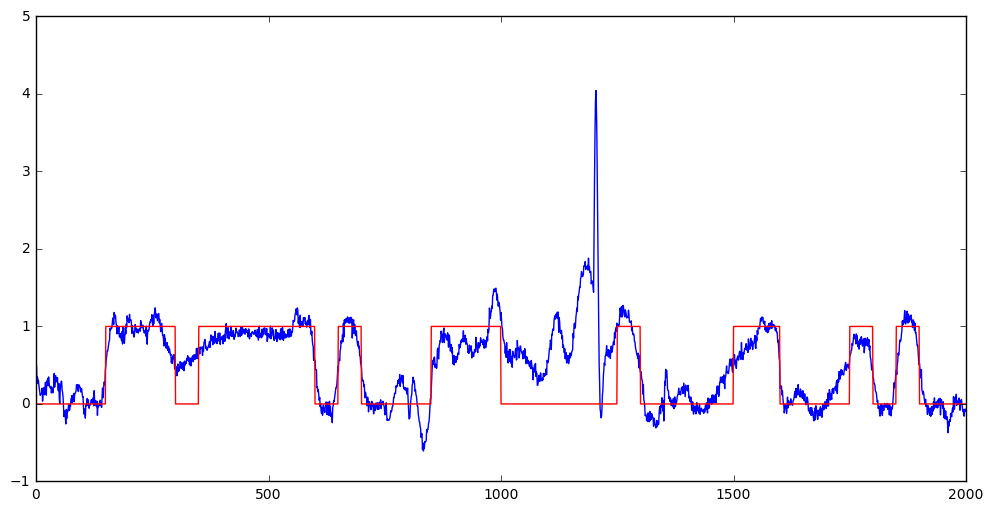

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(111)
print(len(predictedParity))
# plt.plot(predictedParity[66600:66800])
plt.plot(predictedParity[6000:8000],"b")
plt.plot(test_parity[6000:8000], "r")
plt.show()